<a href="https://colab.research.google.com/github/M-SAAD-BIN-MAZHAR/Traffic_Sign_Classification_Model_CNN/blob/main/INTERNSHIPTASK4_TRAFFIC_SIGNALS_CLASSIFICATION_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING DATA**

In [38]:
from google.colab import files
files.upload()  # Choose kaggle.json here


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"msaadbinmazhar","key":"441dd9d1822cf614497da12344b75301"}'}

In [29]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [30]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip gtsrb-german-traffic-sign.zip -d gtsrb


Streaming output truncated to the last 5000 lines.
  inflating: gtsrb/train/5/00005_00053_00010.png  
  inflating: gtsrb/train/5/00005_00053_00011.png  
  inflating: gtsrb/train/5/00005_00053_00012.png  
  inflating: gtsrb/train/5/00005_00053_00013.png  
  inflating: gtsrb/train/5/00005_00053_00014.png  
  inflating: gtsrb/train/5/00005_00053_00015.png  
  inflating: gtsrb/train/5/00005_00053_00016.png  
  inflating: gtsrb/train/5/00005_00053_00017.png  
  inflating: gtsrb/train/5/00005_00053_00018.png  
  inflating: gtsrb/train/5/00005_00053_00019.png  
  inflating: gtsrb/train/5/00005_00053_00020.png  
  inflating: gtsrb/train/5/00005_00053_00021.png  
  inflating: gtsrb/train/5/00005_00053_00022.png  
  inflating: gtsrb/train/5/00005_00053_00023.png  
  inflating: gtsrb/train/5/00005_00053_00024.png  
  inflating: gtsrb/train/5/00005_00053_00025.png  
  inflating: gtsrb/train/5/00005_00053_00026.png  
  inflating: gtsrb/train/5/00005_00053_00027.png  
  inflating: gtsrb/train/5/0000

In [5]:
import pandas as pd

train_csv = pd.read_csv("/content/gtsrb/Train.csv")
test_csv = pd.read_csv("/content/gtsrb/Test.csv")
train_csv.head()


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [42]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


# **RESIZING AND NORMALIZING**

In [6]:
import pandas as pd
import cv2
import numpy as np
import os

# Read CSV
train_csv = pd.read_csv("/content/gtsrb/Train.csv")
test_csv = pd.read_csv("/content/gtsrb/Test.csv")


# Image folder base path
base_path = "/content/gtsrb"  # adjust if needed

X_train = []
y_train = []
X_test=[]
y_test=[]

# Loop through CSV rows
for idx, row in train_csv.iterrows():
    img_path = os.path.join(base_path, row["Path"])
    img = cv2.imread(img_path)
    img = cv2.resize(img, (48, 48))  # Resize to fixed size
    X_train.append(img)
    y_train.append(row["ClassId"])
for idx, row in test_csv.iterrows():
    img_path = os.path.join(base_path, row["Path"])
    img = cv2.imread(img_path)
    img = cv2.resize(img, (48, 48))  # Resize to fixed size
    X_test.append(img)
    y_test.append(row["ClassId"])

# Convert to NumPy arrays
X_train = np.array(X_train) / 255.0  # Normalize pixel values
y_train = np.array(y_train)
X_test=np.array(X_test)/255.0
y_test=np.array(y_test)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (39209, 48, 48, 3)
y_train shape: (39209,)
X_test shape: (12630, 48, 48, 3)
y_test shape: (12630,)


# **ONE HOT ENCODING**

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
num_classes=len(np.unique(y_train))
y_train=to_categorical(y_train,num_classes)
print(y_train.shape)

(39209, 43)


In [9]:
num_classes=len(np.unique(y_test))
y_test=to_categorical(y_test,num_classes)
print(y_test.shape)

(12630, 43)


# **SPLITTING OF DATASET**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (31367, 48, 48, 3) (31367, 43)
Validation set: (7842, 48, 48, 3) (7842, 43)
Test set: (12630, 48, 48, 3) (12630, 43)


# **IMPORTING LIBRARIES**

In [11]:
import tensorflow
tensorflow.random.set_seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ***CNN MODEL***  

---



In [48]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='valid',input_shape=(48,48,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(43,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,219 (414.92 KB)

 Trainable params: 106,219 (414.92 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [15]:
history=model.fit(X_train,y_train,epochs=15,validation_data=(X_val,y_val))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.3582 - loss: 2.3373 - val_accuracy: 0.8938 - val_loss: 0.3641
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9190 - loss: 0.2846 - val_accuracy: 0.9420 - val_loss: 0.1966
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9606 - loss: 0.1377 - val_accuracy: 0.9693 - val_loss: 0.1148
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9787 - loss: 0.0767 - val_accuracy: 0.9818 - val_loss: 0.0714
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9837 - loss: 0.0609 - val_accuracy: 0.9773 - val_loss: 0.0814
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9868 - loss: 0.0461 - val_accuracy: 0.9846 - val_loss: 0.0585
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9877 - loss: 0.0440 - val_accuracy: 0.9797 - val_loss: 0.0764
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9907 - loss: 0.0323 - val_accur

# **TRAIN VS VALIDATION ACCURACY**

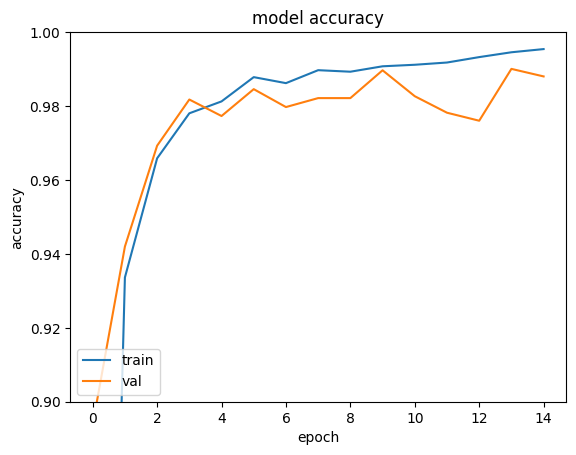

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.9,1)
plt.legend(['train','val'],loc='lower left')
plt.show()

# **CLASSIFICATION REPORT**

In [18]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
print(classification_report(y_test,y_pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        60
           1       0.93      0.97      0.95       720
           2       0.94      0.98      0.96       750
           3       0.89      0.94      0.92       450
           4       0.98      0.94      0.96       660
           5       0.89      0.92      0.90       630
           6       0.99      0.81      0.89       150
           7       0.98      0.91      0.94       450
           8       0.96      0.93      0.94       450
           9       0.95      0.99      0.97       480
          10       0.98      0.98      0.98       660
          11       0.92      0.92      0.92       420
          12       0.99      0.97      0.98       690
          13       0.99      1.00      0.99       720
          14       0.99      1.00      0.99       270
          15       0.94      0.99      0.96       210
          16       0.98      0.99      0

 # **TRAIN VS VALIDATION LOSS**

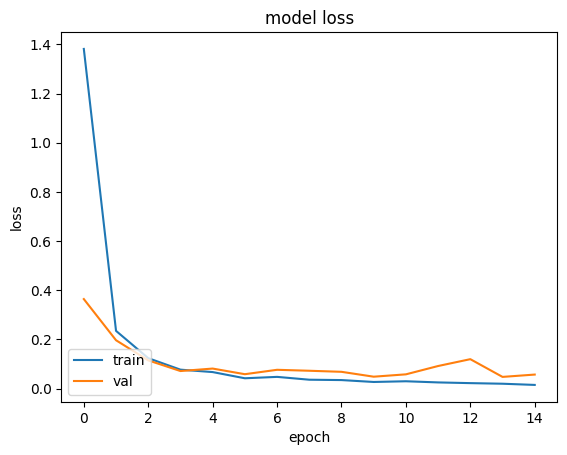

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train','val'],loc='lower left')
plt.show()

# **ACCURACY SCORE**

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.944972288202692

# **CONFUSION MATRIX**

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

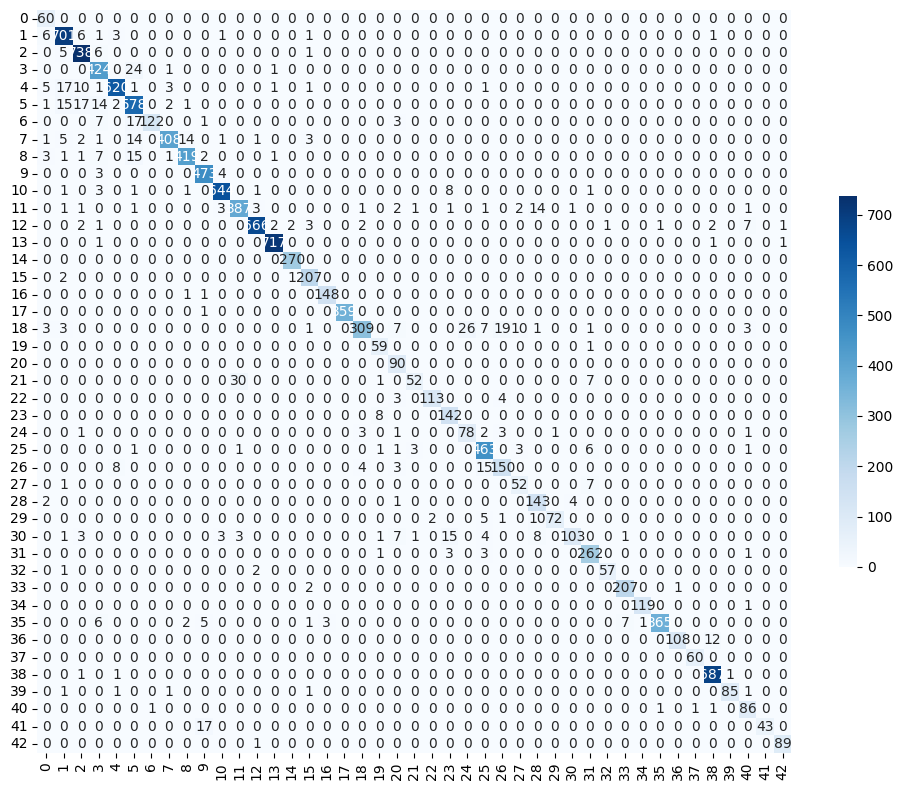

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .5})
plt.tight_layout()
plt.show()

# **DATA AGUMENTATION**

In [57]:
import tensorflow as tf
batch_size = 32

# Augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Augmentation configuration for testing/validation: only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    '/content/gtsrb/Train',
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Validation split from training data
validation_split = 0.2
train_datagen_with_split = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split
)

# Create iterators
validation_iterator = train_datagen_with_split.flow_from_directory(
    '/content/gtsrb/Train',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

train_iterator = train_datagen_with_split.flow_from_directory(
    '/content/gtsrb/Train',
    target_size=(48,48),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Convert to tf.data.Dataset and apply repeat
def generator_to_dataset(generator):
    dataset = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),  # Adjust based on your data type
        output_shapes=([None, 48, 48, 3], [None, 43])  # Adjust shapes based on batch_size and classes
    ).repeat()  # Repeat indefinitely
    return dataset.prefetch(tf.data.AUTOTUNE)

train_dataset = generator_to_dataset(train_iterator)
validation_dataset = generator_to_dataset(validation_iterator)

Found 39209 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.
Found 31368 images belonging to 43 classes.


In [58]:
train_samples = int(39209 * (1 - validation_split))
val_samples = int(39209 * validation_split)
steps_per_epoch = train_samples // batch_size
validation_steps = val_samples // batch_size

print(f"Train samples: {train_samples}, Steps per epoch: {steps_per_epoch}")
print(f"Validation samples: {val_samples}, Validation steps: {validation_steps}")

# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_dataset,
    validation_steps=validation_steps
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_dataset, steps=validation_steps)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Train samples: 31367, Steps per epoch: 980
Validation samples: 7841, Validation steps: 245
Epoch 1/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 127s 129ms/step - accuracy: 0.9669 - loss: 0.1039 - val_accuracy: 0.8620 - val_loss: 0.6110
Epoch 2/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 141s 143ms/step - accuracy: 0.9692 - loss: 0.0906 - val_accuracy: 0.8472 - val_loss: 0.7388
Epoch 3/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 122s 125ms/step - accuracy: 0.9693 - loss: 0.0932 - val_accuracy: 0.8466 - val_loss: 0.6741
Epoch 4/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 143s 146ms/step - accuracy: 0.9701 - loss: 0.0892 - val_accuracy: 0.8681 - val_loss: 0.6177
Epoch 5/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 143s 146ms/step - accuracy: 0.9783 - loss: 0.0706 - val_accuracy: 0.8590 - val_loss: 0.7104
Epoch 6/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 141s 144ms/step - accuracy: 0.9787 - loss: 0.0686 - val_accuracy: 0.8672 - val_loss: 0.7127
Epoch 7/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 119s 122ms/step - accuracy: 0.9783 - loss: 0.0716 - val_accuracy: 0.8493 - va

KeyboardInterrupt: 

# **TRANSFER LEARNING USING MOBILENET **

In [23]:
from keras.applications.mobilenet import MobileNet

In [24]:
conv_base=MobileNet(weights='imagenet',include_top=False,input_shape=(48,48,3))

/tmp/ipython-input-1471391586.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base=MobileNet(weights='imagenet',include_top=False,input_shape=(48,48,3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
conv_base.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 24, 24, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 24, 24, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 24, 24, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 24, 24, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 12, 12, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 12, 12, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 12, 12, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 12, 12, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [32]:
model1=Sequential()
model1.add(conv_base)
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(43,activation='softmax'))

In [33]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 1, 1, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371,115 (12.86 MB)

 Trainable params: 142,251 (555.67 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [34]:
conv_base.trainable=False


In [35]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 1, 1, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371,115 (12.86 MB)

 Trainable params: 142,251 (555.67 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [36]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
history=model1.fit(X_train,y_train,epochs=15,validation_data=(X_val,y_val))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2823 - loss: 2.4696 - val_accuracy: 0.2661 - val_loss: 2.5117
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.2916 - loss: 2.4355 - val_accuracy: 0.2785 - val_loss: 2.4778
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.2945 - loss: 2.4190 - val_accuracy: 0.2744 - val_loss: 2.4856
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.3006 - loss: 2.4009 - val_accuracy: 0.2830 - val_loss: 2.4694
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3052 - loss: 2.3914 - val_accuracy: 0.2817 - val_loss: 2.4592
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3118 - loss: 2.3712 - val_accuracy: 0.2877 - val_loss: 2.4546
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.3120 - loss: 2.3460 - val_accuracy: 0.2828 - val_loss: 2.4475
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3149 - loss: 2.3454 - val_accurac

#**MOBILE NET ==> TRAINING VS VALIDATION ACCURACY **

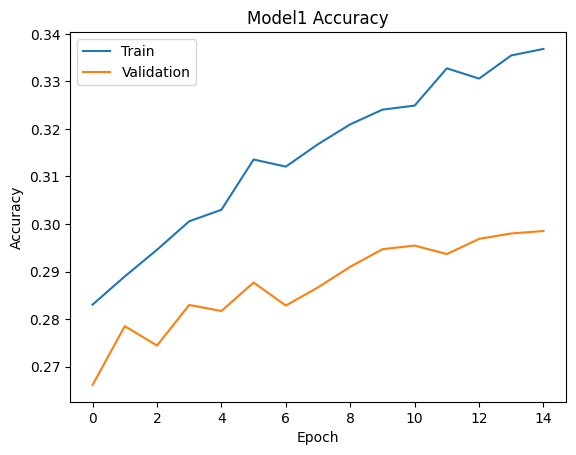

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model1 Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show( )

#**MOBILE NET ==> TRAINING VS VALIDATION LOSS **

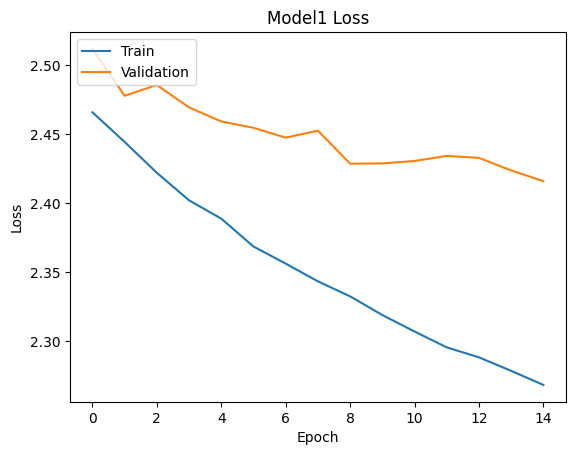

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model1 Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')


# **ACCURACY SCORE**

In [41]:
y_predict1=model1.predict(X_test)
y_predict1=np.argmax(y_predict1,axis=1)
print(accuracy_score(y_test,y_predict1))

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step
0.22074425969912906


# **CLASSIFICATION REPORT**

In [48]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.33      0.31      0.32       720
           2       0.16      0.19      0.17       750
           3       0.09      0.06      0.07       450
           4       0.08      0.06      0.07       660
           5       0.19      0.15      0.17       630
           6       0.00      0.00      0.00       150
           7       0.22      0.14      0.17       450
           8       0.11      0.24      0.15       450
           9       0.17      0.09      0.12       480
          10       0.16      0.25      0.20       660
          11       0.14      0.11      0.13       420
          12       0.24      0.34      0.28       690
          13       0.23      0.65      0.34       720
          14       0.52      0.41      0.46       270
          15       0.50      0.48      0.49       210
          16       0.38      0.23      0.28       150
          17       0.53    

# **TUNNING OF MOBILENET**

In [73]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:

  if layer.name=='conv_dw_13':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False
for layer in conv_base.layers:
    print(layer.name,layer.trainable)

input_layer_1 False
conv1 False
conv1_bn False
conv1_relu False
conv_dw_1 False
conv_dw_1_bn False
conv_dw_1_relu False
conv_pw_1 False
conv_pw_1_bn False
conv_pw_1_relu False
conv_pad_2 False
conv_dw_2 False
conv_dw_2_bn False
conv_dw_2_relu False
conv_pw_2 False
conv_pw_2_bn False
conv_pw_2_relu False
conv_dw_3 False
conv_dw_3_bn False
conv_dw_3_relu False
conv_pw_3 False
conv_pw_3_bn False
conv_pw_3_relu False
conv_pad_4 False
conv_dw_4 False
conv_dw_4_bn False
conv_dw_4_relu False
conv_pw_4 False
conv_pw_4_bn False
conv_pw_4_relu False
conv_dw_5 False
conv_dw_5_bn False
conv_dw_5_relu False
conv_pw_5 False
conv_pw_5_bn False
conv_pw_5_relu False
conv_pad_6 False
conv_dw_6 False
conv_dw_6_bn False
conv_dw_6_relu False
conv_pw_6 False
conv_pw_6_bn False
conv_pw_6_relu False
conv_dw_7 False
conv_dw_7_bn False
conv_dw_7_relu False
conv_pw_7 False
conv_pw_7_bn False
conv_pw_7_relu False
conv_dw_8 False
conv_dw_8_bn False
conv_dw_8_relu False
conv_pw_8 False
conv_pw_8_bn False
conv_pw_8_

# **ADDING DENSE LAYERS**

In [81]:
model2=Sequential()
model2.add(conv_base)
model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(43,activation='softmax'))

In [82]:
model2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 1, 1, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,297,259 (12.58 MB)

 Trainable params: 1,130,283 (4.31 MB)

 Non-trainable params: 2,166,976 (8.27 MB)

In [83]:
from tensorflow.keras.optimizers import Adam

In [84]:
model2.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-5),metrics=['accuracy'])

In [85]:
history2=model2.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.0599 - loss: 5.0095 - val_accuracy: 0.3882 - val_loss: 2.5063
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2646 - loss: 2.8855 - val_accuracy: 0.6298 - val_loss: 1.6728
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4346 - loss: 2.1690 - val_accuracy: 0.7257 - val_loss: 1.2026
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5451 - loss: 1.7299 - val_accuracy: 0.7781 - val_loss: 0.9240
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6174 - loss: 1.4185 - val_accuracy: 0.8120 - val_loss: 0.7486
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6706 - loss: 1.2054 - val_accuracy: 0.8407 - val_loss: 0.6245
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7136 - loss: 1.0373 - val_accuracy: 0.8646 - val_loss: 0.5317
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7493 - loss: 0.9021 - val_accuracy:

#  **ACCURACY SCORE WITH TUNNING**

In [88]:
y_predict2=model2.predict(X_test)
y_predict2=np.argmax(y_predict2,axis=1)
print(accuracy_score(y_test,y_predict2))

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
0.7384798099762471


# **CLASSIFICATION REPORT**

In [89]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.33      0.08      0.13        60
           1       0.69      0.71      0.70       720
           2       0.59      0.61      0.60       750
           3       0.55      0.52      0.53       450
           4       0.72      0.72      0.72       660
           5       0.65      0.68      0.66       630
           6       0.94      0.86      0.90       150
           7       0.70      0.72      0.71       450
           8       0.68      0.63      0.66       450
           9       0.90      0.78      0.84       480
          10       0.82      0.95      0.88       660
          11       0.68      0.75      0.71       420
          12       0.98      0.99      0.98       690
          13       0.97      0.99      0.98       720
          14       0.97      0.87      0.92       270
          15       0.98      0.96      0.97       210
          16       0.96      0.93      0.94       150
          17       0.94    

# TUNNING ==>TRAINING VS VALIDATION ACCURACY SCORE

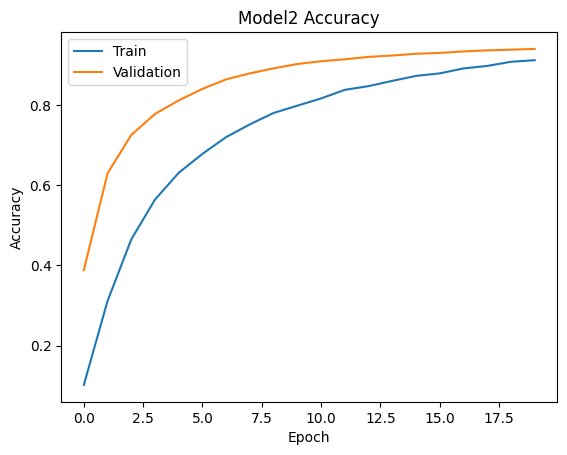

In [90]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model2 Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')

# TUNNING ==>TRAINING VS VALIDATION LOSS SCORE

Text(0.5, 0, 'Epoch')

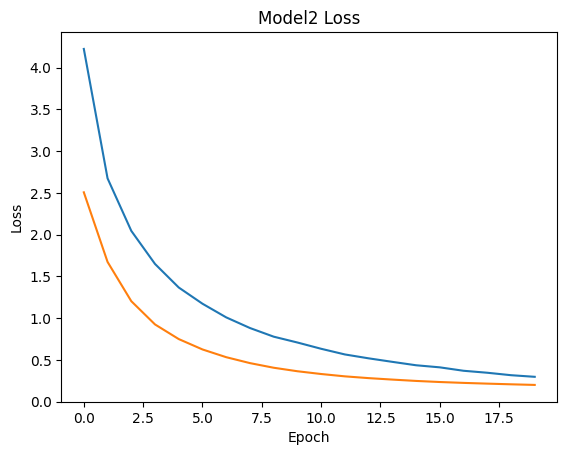

In [91]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")

# **SAVING THE BEST MODEL**

In [60]:
model.save('traffic_sign_model.keras')